# Softmax Classification

Yesterday, we explored how to train a binary classifier using **logistic regression**. Today, we’ll generalize that idea to handle **multiple classes**. This generalization is known as **softmax regression**, or **multinomial logistic regression**.

### The Idea

In binary logistic regression, we used a single score function to compute the probability of a class. For multiclass classification, we extend this by defining one **score function** per class:

$$
s_k(x) = \theta_k^T x
$$

Here, $s_k(x)$ is the score for class $k$, and $\theta_k$ is the parameter vector for that class.

To turn these scores into probabilities that sum to one, we apply the **softmax function**:

$$
\hat{p}_k = \sigma(x)_k = \frac{\exp(s_k(x))}{\sum_{j=1}^K \exp(s_j(x))}
$$

This gives us a vector of probabilities over all $K$ classes. The predicted class is simply the one with the highest probability:

$$
\hat{y} = \arg\max_k ~ \sigma(x)_k
$$

### Training with Cross-Entropy Loss

To train the model, we use the **cross-entropy loss**, which compares the predicted probability distribution with the true distribution (a one-hot vector for classification):

$$
J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y^{(i)}_k \log(\hat{p}^{(i)}_k)
$$

Here, $y^{(i)}_k$ is 1 if class $k$ is the true class for example $i$, and 0 otherwise.

---

### Softmax in Action: Iris Dataset

Let’s see how softmax classification performs on the classic Iris dataset, using the same features we used for logistic regression: **petal length** and **petal width**.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = iris["target"]

softmax = LogisticRegression()
softmax.fit(X, y)

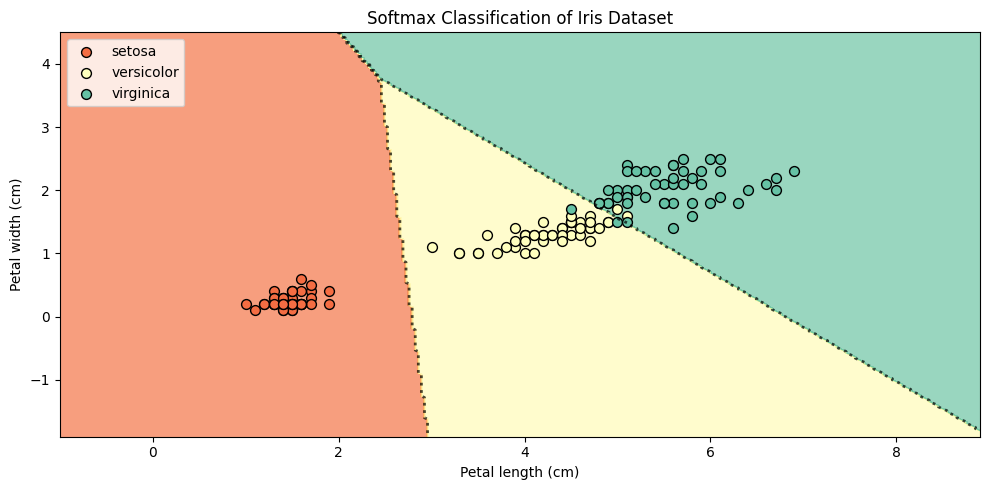

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

k=3
# Meshgrid
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Softmax probabilities: shape (n_points, n_classes)
probs = softmax.predict_proba(grid)
probs = probs.reshape(xx.shape[0], xx.shape[1], -1)  # reshape to grid shape

# Predicted class at each grid point
predicted_class = np.argmax(probs, axis=2)

# Plotting
plt.figure(figsize=(10, 5))

labels = iris.target_names

cmap = plt.get_cmap("Spectral")
cmap = cmap(np.linspace(0.2, 0.8, 256)) 
cmap = ListedColormap(cmap)

plt.contourf(xx, yy, predicted_class, cmap=cmap, levels=20, alpha=0.7)

plt.contour(xx, yy, predicted_class, levels=np.arange(probs.shape[2] + 1) - 0.5, colors='black', linestyles=':', linewidths=2, alpha=0.7)
for i in range(k):
    plt.scatter(X[y==i][:, 0], X[y == i][:, 1], color=cmap(i/2), label=labels[i], edgecolor='k', alpha=1, s=50)

# Draw decision boundaries (contours between classes)

# Labels and legend
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Softmax Classification of Iris Dataset")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


This visualization shows how softmax regression partitions the feature space into decision regions for each class. Unlike binary logistic regression, softmax handles all classes in one unified model.